# Decision Trees

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

import sklearn
sklearn.set_config(print_changed_only=True)
plt.rcParams["figure.dpi"] = 300
np.set_printoptions(precision=3)

from sklearn.model_selection import train_test_split
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import scale, StandardScaler

In [3]:
from sklearn.datasets import load_breast_cancer
cancer = load_breast_cancer()

print(cancer.DESCR)

.. _breast_cancer_dataset:

Breast cancer wisconsin (diagnostic) dataset
--------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 569

    :Number of Attributes: 30 numeric, predictive attributes and the class

    :Attribute Information:
        - radius (mean of distances from center to points on the perimeter)
        - texture (standard deviation of gray-scale values)
        - perimeter
        - area
        - smoothness (local variation in radius lengths)
        - compactness (perimeter^2 / area - 1.0)
        - concavity (severity of concave portions of the contour)
        - concave points (number of concave portions of the contour)
        - symmetry 
        - fractal dimension ("coastline approximation" - 1)

        The mean, standard error, and "worst" or largest (mean of the three
        largest values) of these features were computed for each image,
        resulting in 30 features.  For instance, field 3 is Mean Radius, f

In [5]:
X_train, X_test, y_train, y_test = train_test_split(
    cancer.data, cancer.target, stratify=cancer.target, random_state=0)

# Tree Visualization

In [6]:
from sklearn.tree import DecisionTreeClassifier, plot_tree
tree = DecisionTreeClassifier(max_depth=2)
tree.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=2)

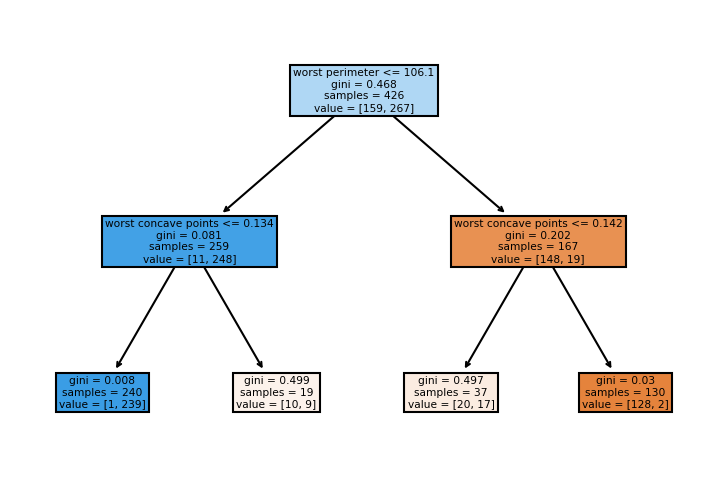

In [10]:
plt.figure(dpi=150)
plot_tree(tree, feature_names=cancer.feature_names, filled=True);

# Parameter Tuning

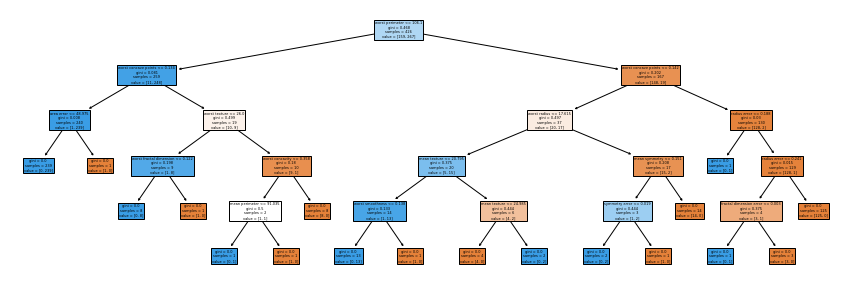

In [14]:
tree = DecisionTreeClassifier().fit(X_train, y_train)
plt.figure(figsize=(15, 5))
plot_tree(tree, feature_names=cancer.feature_names, filled=True);

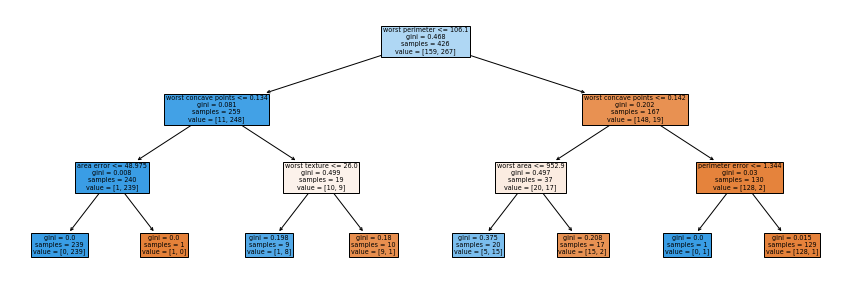

In [23]:
# tuning max_depth (how deep the tree goes)
tree = DecisionTreeClassifier(max_depth=3).fit(X_train, y_train)
plt.figure(figsize=(15, 5))
plot_tree(tree, feature_names=cancer.feature_names, filled=True);

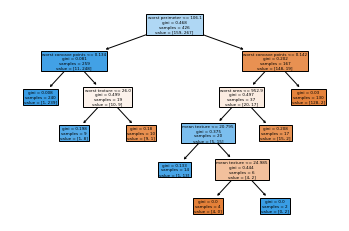

In [17]:
# tuning max_leaf_nodes
tree = DecisionTreeClassifier(max_leaf_nodes=8).fit(X_train, y_train)
plot_tree(tree, feature_names=cancer.feature_names, filled=True);

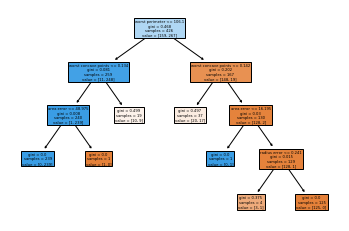

In [18]:
# tuning min_samples_split
tree = DecisionTreeClassifier(min_samples_split=50).fit(X_train, y_train)
plot_tree(tree, feature_names=cancer.feature_names, filled=True);

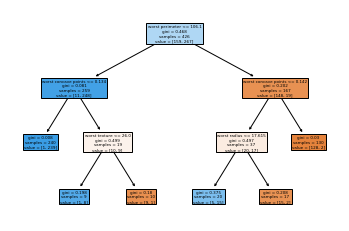

In [19]:
# tuning min_impurity_decrease
tree = DecisionTreeClassifier(min_impurity_decrease=.01).fit(X_train, y_train)
plot_tree(tree, feature_names=cancer.feature_names, filled=True);

# Modeling

First, we'll Grid Search a Decision Tree to find the ideal depth (`max_depth`)

In [24]:
from sklearn.model_selection import GridSearchCV

param_grid = {'max_depth':range(1, 7)}

grid = GridSearchCV(DecisionTreeClassifier(random_state=0), param_grid=param_grid, cv=10)
grid.fit(X_train, y_train)

print("Training set accuracy: %s" % grid.score(X_train, y_train))
print("Test set accuracy: %s" % grid.score(X_test, y_test))

Training set accuracy: 1.0
Test set accuracy: 0.9020979020979021


C:\Users\jfields\.conda\envs\keras-cpu\lib\site-packages\sklearn\model_selection\_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


Next, we'll Grid Search a Tree to find the ideal max_depth, as well as using a `StratifiedShuffleSplit` for cross-validation.

In [25]:
from sklearn.model_selection import StratifiedShuffleSplit

param_grid = {'max_depth':range(1, 7)}
grid = GridSearchCV(DecisionTreeClassifier(random_state=0), param_grid=param_grid,
                    cv=StratifiedShuffleSplit(100), return_train_score=True)

grid.fit(X_train, y_train)

print("Training set accuracy: %s" % grid.score(X_train, y_train))
print("Test set accuracy: %s" % grid.score(X_test, y_test))

Training set accuracy: 1.0
Test set accuracy: 0.9020979020979021


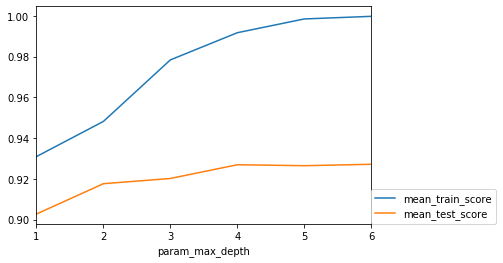

In [27]:
scores = pd.DataFrame(grid.cv_results_)
scores.plot(x='param_max_depth', y=['mean_train_score', 'mean_test_score'], ax=plt.gca())
plt.legend(loc=(1, 0));

The Stratified Shuffle didn't do too much. 

Next we'll Grid Search max_leaf_nodes:

Training set accuracy: 0.9812206572769953
Test set accuracy: 0.9300699300699301


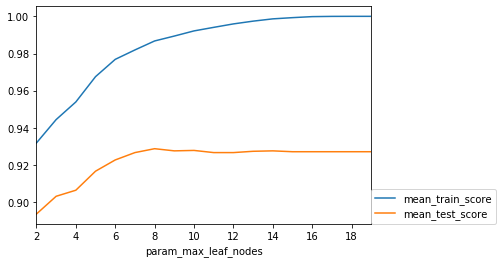

In [29]:
param_grid = {'max_leaf_nodes': range(2, 20)}

grid = GridSearchCV(DecisionTreeClassifier(random_state=0), param_grid=param_grid,
                    cv=StratifiedShuffleSplit(100, random_state=1),
                   return_train_score=True)
grid.fit(X_train, y_train)

print("Training set accuracy: %s" % grid.score(X_train, y_train))
print("Test set accuracy: %s" % grid.score(X_test, y_test))

scores = pd.DataFrame(grid.cv_results_)
scores.plot(x='param_max_leaf_nodes', y=['mean_train_score', 'mean_test_score'], ax=plt.gca())
plt.legend(loc=(1, 0));

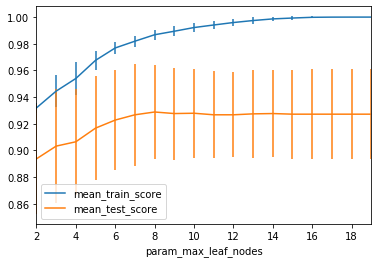

In [31]:
scores = pd.DataFrame(grid.cv_results_)
scores.plot(x='param_max_leaf_nodes', y='mean_train_score', yerr='std_train_score', ax=plt.gca())
scores.plot(x='param_max_leaf_nodes', y='mean_test_score', yerr='std_test_score', ax=plt.gca());

In [32]:
grid.best_params_

{'max_leaf_nodes': 8}

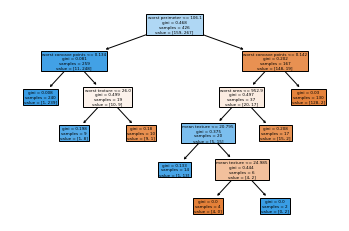

In [34]:
plot_tree(grid.best_estimator_, feature_names=cancer.feature_names, filled=True);

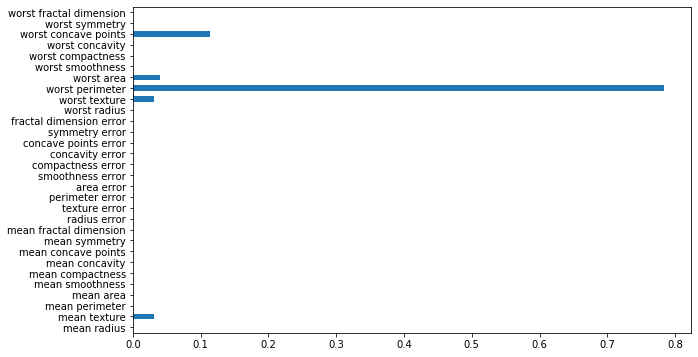

In [39]:
plt.figure(figsize=(10,6))
pd.Series(grid.best_estimator_.feature_importances_,
          index=cancer.feature_names).plot(kind="barh");

# Exercise
Apply a decision tree to the "adult" dataset and visualize it.

Tune parameters with grid-search; try at least max_leaf_nodes and max_depth, but separately.

Visualize the resulting tree and it's feature importances.

In [42]:
# import data
data = pd.read_csv("data/adult.csv", index_col=0)
data.head()

income = data.income
data_features = data.drop("income", axis=1)

# one hot encode
data_one_hot = pd.get_dummies(data_features)

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(data_one_hot, income)

# scale data
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler().fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

#### Training a basic Tree with no tuning

In [46]:
tree = DecisionTreeClassifier()
tree.fit(X_train_scaled, y_train)
print("Training set accuracy: %s" % tree.score(X_train_scaled, y_train))
print("Test set accuracy: %s" % tree.score(X_test_scaled, y_test))

Training set accuracy: 0.9798525798525799
Test set accuracy: 0.8161159562707284


#### Training a Tree and tuning max_depth

Training set accuracy: 0.8541769041769042
Test set accuracy: 0.8576341972730622
Best params: {'max_depth': 6}


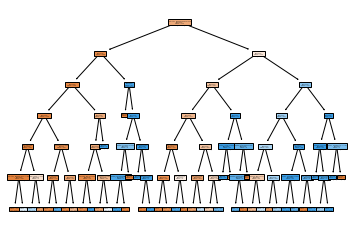

In [59]:
param_grid = {'max_depth':range(1, 7)}

grid = GridSearchCV(DecisionTreeClassifier(random_state=0), param_grid=param_grid, cv=10)
grid.fit(X_train_scaled, y_train)

print("Training set accuracy: %s" % grid.score(X_train_scaled, y_train))
print("Test set accuracy: %s" % grid.score(X_test_scaled, y_test))
print('Best params: %s' % grid.best_params_)

plot_tree(grid.best_estimator_, feature_names=np.array(X_train.columns), filled=True);

#### Training a Tree and tuning max_leaf_nodes

Training set accuracy: 0.8526208026208026
Test set accuracy: 0.8568971870777545
Best params: {'max_leaf_nodes': 18}


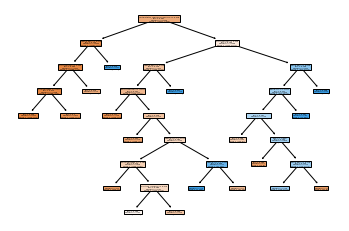

In [60]:
param_grid = {'max_leaf_nodes': range(2, 20)}

grid = GridSearchCV(DecisionTreeClassifier(random_state=0), param_grid=param_grid, cv=10)
grid.fit(X_train_scaled, y_train)

print("Training set accuracy: %s" % grid.score(X_train_scaled, y_train))
print("Test set accuracy: %s" % grid.score(X_test_scaled, y_test))
print('Best params: %s' % grid.best_params_)

plot_tree(grid.best_estimator_, feature_names=np.array(X_train.columns), filled=True);

#### Plotting feature importances

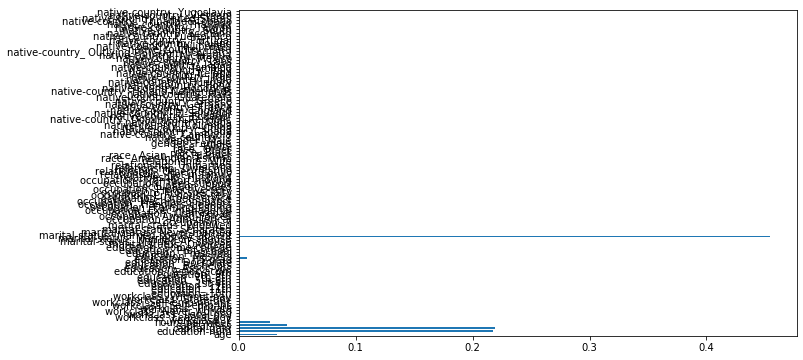

In [65]:
plt.figure(figsize=(10,6))
pd.Series(grid.best_estimator_.feature_importances_,
          index=np.array(X_train.columns)).plot(kind="barh");